# Regresión lineal: punto de no retorno del cambio climático

En esta parte de la clase exploraremos el uso de un modelo de regresión lineal polinomial sencillo para estimar cuando la temperatura promedio del planeta aumentará en 2 °C.

Para ello partiremos por visualizar los datos. Estos provienen del [*Goddard Instutute for Space Science* (GISS)](https://www.giss.nasa.gov).

In [ ]:
# Montamos nuestro drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_archivo = '/content/drive/MyDrive/Módulo Interdisciplinario 2024B/Clases/Clase 3: Herramientas Fundamentales III/temperaturas.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(path_archivo, skiprows=1)

In [ ]:
df.head(10)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.17,-0.23,-0.08,-0.15,-0.09,-0.20,-0.17,-0.09,-0.13,-0.22,-.21,-.16,-.16,***,***,-0.11,-0.15,-.19
1,1881,-0.18,-0.13,0.04,0.06,0.07,-0.17,0.02,-0.02,-0.14,-0.20,-.17,-.05,-.07,-.08,-.16,0.06,-0.06,-.17
2,1882,0.18,0.15,0.06,-0.15,-0.13,-0.22,-0.15,-0.06,-0.13,-0.22,-.15,-.34,-.10,-.07,.09,-0.08,-0.14,-.17
3,1883,-0.28,-0.36,-0.11,-0.17,-0.16,-0.07,-0.05,-0.12,-0.20,-0.10,-.22,-.10,-.16,-.18,-.33,-0.15,-0.08,-.17
4,1884,-0.12,-0.06,-0.35,-0.39,-0.33,-0.35,-0.31,-0.26,-0.26,-0.24,-.32,-.30,-.27,-.26,-.09,-0.36,-0.31,-.28
5,1885,-0.58,-0.33,-0.26,-0.41,-0.44,-0.43,-0.33,-0.30,-0.28,-0.23,-.23,-.09,-.33,-.34,-.40,-0.37,-0.35,-.25
6,1886,-0.43,-0.50,-0.42,-0.27,-0.23,-0.34,-0.17,-0.30,-0.23,-0.27,-.26,-.25,-.31,-.29,-.34,-0.31,-0.27,-.25
7,1887,-0.71,-0.56,-0.35,-0.34,-0.30,-0.24,-0.25,-0.34,-0.25,-0.35,-.25,-.32,-.35,-.35,-.50,-0.33,-0.28,-.28
8,1888,-0.33,-0.36,-0.41,-0.20,-0.22,-0.17,-0.10,-0.15,-0.11,0.02,.03,-.04,-.17,-.19,-.34,-0.28,-0.14,-.02
9,1889,-0.08,0.17,0.06,0.10,-0.01,-0.10,-0.07,-0.20,-0.24,-0.26,-.33,-.28,-.10,-.08,.02,0.05,-0.12,-.27


La columna titulada "J-D" indica la diferencia entre la temperatura base (definida como la temperatura promedio entre los años 1951-1980) y el promedio anual para dicho año.

Haremos un gráfico de la diferencia respecto al promedio en función de los años.

In [ ]:
df = df.drop(df.index[-1]) # Eliminamos la última fila porque no tiene valor de temp.
dif = df['J-D'].values     # Notar que los valores son "strings"
dif = dif.astype(float)    # los transformamos a floats

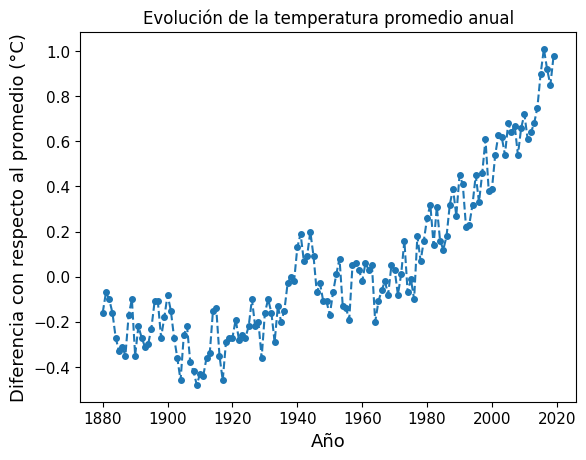

In [ ]:
plt.plot(df['Year'], dif, 'o--', markersize=4)
plt.xlabel('Año', fontsize=13)
plt.ylabel('Diferencia con respecto al promedio (°C)', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Evolución de la temperatura promedio anual')
plt.show()

Exploraremos el uso de un modelo polinomial para explicar la tendencia general de los datos.

Es decir nuestro modelo será (para un grado 2 por ejemplo):

$$T(x, \beta_0, \beta_1, \beta_2) = \beta_0 + \beta_1 x + \beta_2 x^2$$

Si hubiesen 5 datos de temperatura, ¿cómo sería la matriz de diseño?

In [ ]:
# Es ilustrativo crear esta matriz de forma "artesanal"

def design_matrix(grado, years):
  N = len(years)
  M = grado + 1
  X = np.zeros((N, M))
  for i in range(N):
    X[i,:] = np.array([years[i]**(alpha) for alpha in range(grado+1)])
  return X

print(design_matrix(2, [1,2,3,4]))

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]


Para hacer la regresión lineal podemos directamente aplicar el resultado del álgebra lineal o utilizar paquetes que hagan el trabajo por nosotros. En este notebook utilizaremos la librería *sklearn* para resolver el problema.

In [ ]:
from sklearn.linear_model import LinearRegression         # Hará la regresión lineal
from sklearn.preprocessing import PolynomialFeatures      # creará la matriz de diseño para polinomios
from sklearn.metrics import mean_squared_error            # es la métrica del error cuadrático

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=True)                     # bias = True implica añadir el parámetro beta_0
poly_features = poly.fit_transform(np.array([1,2,3,4]).reshape(-1, 1))     # el vector debe ser "columna"

print(poly_features)

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]


In [ ]:
# Ahora lo haremos con los datos reales.
# Creamos la matriz de diseño

matriz_X = poly.fit_transform(df['Year'].values.reshape(-1,1))

# Hacemos el fit de parámetros
modelo = LinearRegression()
modelo.fit(matriz_X, dif)

LinearRegression()

In [ ]:
# Podemos ver los coeficientes
modelo.coef_

array([ 0.00000000e+00, -3.37695432e-01,  8.85226037e-05])

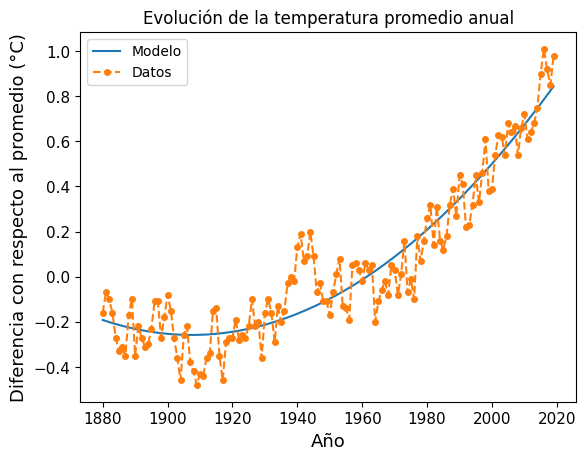

In [ ]:
# Veamos el modelo

plt.plot(df['Year'].values, modelo.predict(matriz_X), label='Modelo') # Hay que darle una matriz para evaluar :)
plt.plot(df['Year'], dif, 'o--', markersize=4, label='Datos')
plt.xlabel('Año', fontsize=13)
plt.ylabel('Diferencia con respecto al promedio (°C)', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Evolución de la temperatura promedio anual')
plt.legend()
plt.show()

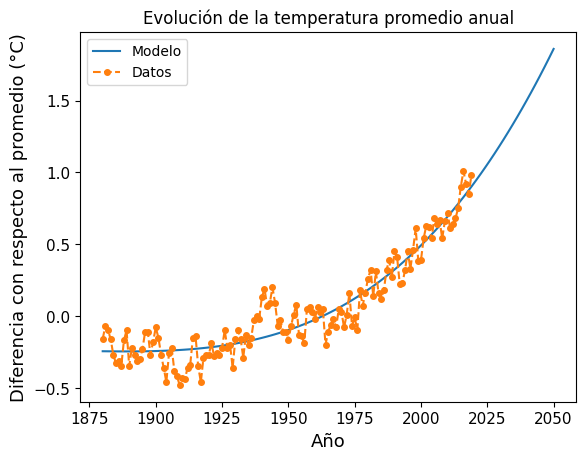

In [ ]:
# Podemos extender el rango del modelo para ver su predicción.

matriz_pred = poly.fit_transform(np.linspace(1880, 2050,100).reshape(-1,1))

plt.plot(np.linspace(1880, 2050,100), modelo.predict(matriz_pred), label='Modelo') # Hay que darle una matriz para evaluar :)
plt.plot(df['Year'], dif, 'o--', markersize=4, label='Datos')
plt.xlabel('Año', fontsize=13)
plt.ylabel('Diferencia con respecto al promedio (°C)', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Evolución de la temperatura promedio anual')
plt.legend()
plt.show()

# Cross validation sencillo

Utilizaremos cross-validation para estimar el número óptimo de parámetros para algún set de datos. En este caso generaremos aleatoriamente datos.

Consideraremos una función:

$$f(x) = 5ln(3x)\sin(2x) $$

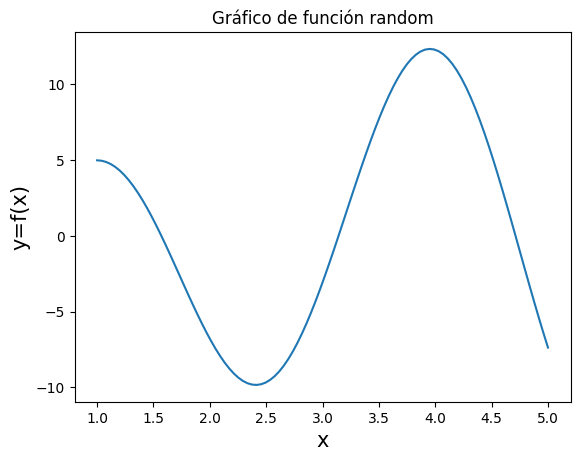

In [ ]:
plt.plot(np.linspace(1,5,100), 5*np.log(3*np.linspace(1,5,100))* np.sin(2*np.linspace(1,5,100)))
plt.xlabel('x', fontsize=15)
plt.ylabel('y=f(x)', fontsize=15)
plt.title('Gráfico de función random')
plt.show()

In [ ]:
import numpy as np
# Generamos un set de datos random
N_datos = 100
datos = np.zeros(N_datos)
x_values = np.linspace(1,5, 100)
np.random.seed(123)
sigmas = np.random.normal(loc=0, scale=3, size=100)
sigmas = np.abs(sigmas)

datos_random = np.random.normal(loc=5*np.log(3*x_values)* np.sin(2*x_values), scale=sigmas)

Los visualizamos...

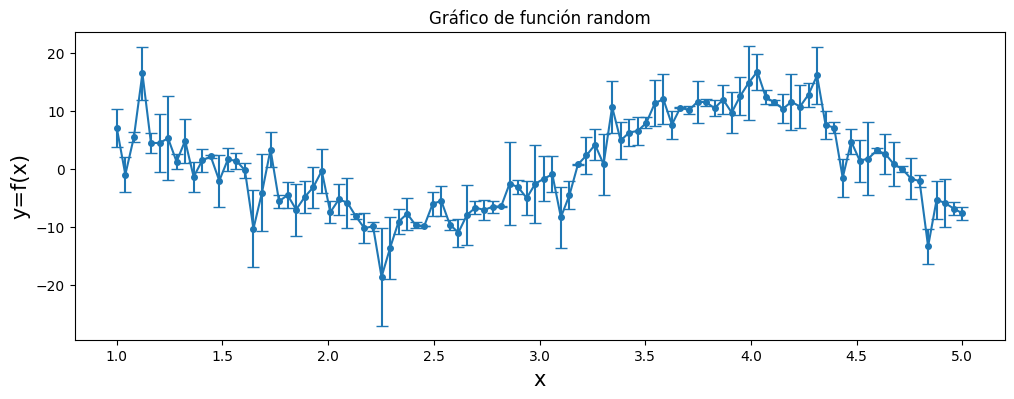

In [ ]:
plt.figure(figsize=(12,4))
plt.errorbar(x_values, datos_random, yerr=sigmas, capsize=4, marker='o', markersize=4)
plt.xlabel('x', fontsize=15)
plt.ylabel('y=f(x)', fontsize=15)
plt.title('Gráfico de función random')
plt.show()

Ahora, utilizando cross-validation, determinaremos el mejor grado de un polinomio para estimar nuestros datos, favoreciendo la capacidad predictiva del modelo.

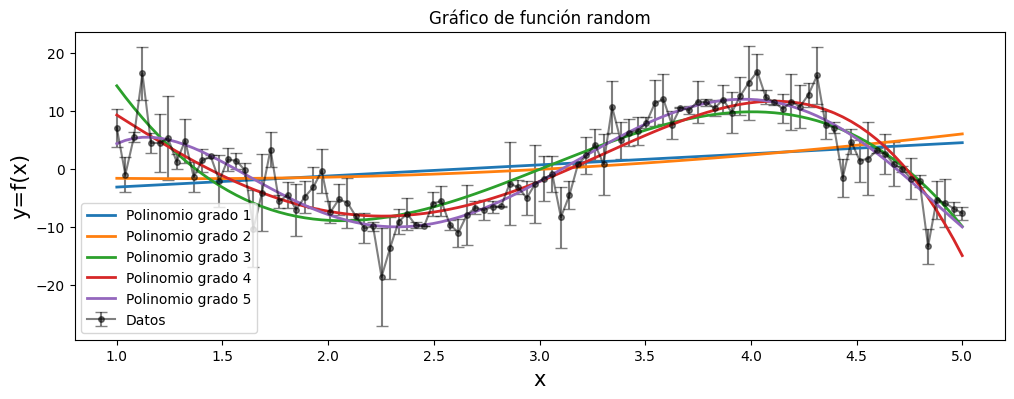

In [ ]:
plt.figure(figsize=(12,4))
plt.errorbar(x_values, datos_random, yerr=sigmas, capsize=4, marker='o', alpha=0.5, color='black', label='Datos', markersize=4)
plt.xlabel('x', fontsize=15)
plt.ylabel('y=f(x)', fontsize=15)
plt.title('Gráfico de función random')

# Haremos un plot de fiteos de polinomios de cada vez un grado mayor.
for i in range(5):
  poly = PolynomialFeatures(1+i, include_bias=True)
  matriz_X = poly.fit_transform(x_values.reshape(-1,1))

  # Hacemos el fit de parámetros
  modelo = LinearRegression()
  modelo.fit(matriz_X, datos_random)

  plt.plot(x_values, modelo.predict(matriz_X), label=f'Polinomio grado {i+1}', linewidth=2)


plt.legend()
plt.show()

La idea ahora es repetir lo anterior pero escogiendo un subgrupo de los datos, para ello utilizaremos la función *train_test_split* de sklearn.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
errores_modelos = np.zeros((10, 100))    # Aquí guardaremos el error cuadrático medio de cada fit

# Repetimos el experimento de seleccionar un sub-sample, hacer el para cada grado del polinomio
# y luego evaluar el error promedio.
for i in range(100):
    # Aquí seleccionamos de forma aleatoria un subsample.
    x_train,x_test,y_train,y_test=train_test_split(x_values,datos_random,train_size=0.75)
    for j in range(10):
        poly = PolynomialFeatures(degree=j+1, include_bias=True)

        poly_features = poly.fit_transform(x_train.reshape(-1, 1))     # genera la matriz de diseño del polonomio :)

        poly_test = poly.fit_transform(x_test.reshape(-1,1))           # matriz de diseño para el dataset de testeo
        poly_reg_model = LinearRegression()
        poly_reg_model.fit(poly_features, y_train)                     # esta parte hace el álgebra lineal
        y_predicted = poly_reg_model.predict(poly_test)

        errores_modelos[j,i] = mean_squared_error(y_test, y_predicted)


Text(0, 0.5, 'Error cuadrático medio')

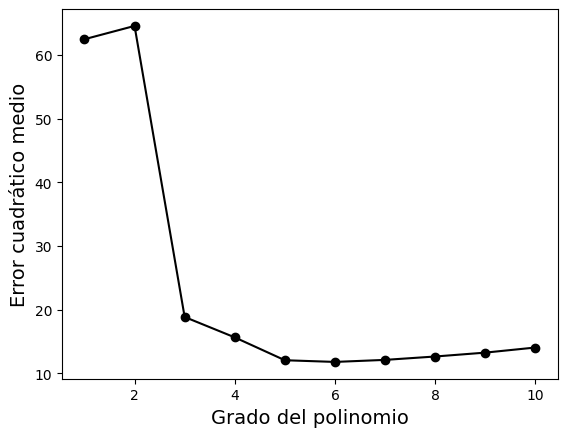

In [ ]:
promedio_modelos =  np.mean(errores_modelos, axis=1)
plt.plot(np.arange(1,11), promedio_modelos, 'o-', color='black')
plt.xlabel('Grado del polinomio', fontsize=14)
plt.ylabel('Error cuadrático medio', fontsize=14)

In [ ]:
print(f'El mejor modelo es el polinomio de grado {np.argmin(promedio_modelos)+1}.')

El mejor modelo es el polinomio de grado 6.


# Ajuste de un modelo no-lineal

Ahora, ajustaremos un modelo no-lineal a los datos antes generados, para ello nos aprovecharemos de la función [curve fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) de **scipy**.

In [ ]:
from scipy.optimize import curve_fit

Ajustaremos un modelo de la forma
$$f(x,\alpha_1,\alpha_2,\alpha_3) = \alpha_1\ln(\alpha_2 x)\sin(\alpha_3 x), $$
trataremos de obtener los parámetros de la distribución real.

In [ ]:
# Partimos por definir nuestra función modelo
def funcion(x, a,b,c):
  return a*np.log(b*x)*np.sin(c*x)

# Podemos darle a curve_fit los "errores" de los datos, en este caso
# se minimiza la función chi^2

params, cov = curve_fit(funcion, x_values, datos_random, sigma=sigmas)


<ipython-input-37-5b78d06524c4>:3: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x)*np.sin(c*x)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

La función no fue capaz de converger en los parámetros óptimos en  800 iteraciones (los método de gradiente se suelen mover en "pasos" o iteraciones).

Para mejorar el proceso, podemos darle unos parámetros iniciales, esto es importante, porque puede mejorar la velocidad de convergencia, o en este caso, si el método funciona o no. Hay que tener cuidado de que puede que el algoritmo de optimización no se encuentre con mínimos locales, por lo que una buena práctica es tratar con distintos puntos iniciales.

In [ ]:
params, cov = curve_fit(funcion, x_values, datos_random, sigma=sigmas, p0=[10,10,20])

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

Cuidado que no todos los valores iniciales servirán, por lo general uno provee de valores a los que uno cree los parámetros podrían estar cerca, lo que se puede obtener de forma estimada con gráficos sencillos.

In [ ]:
params, cov = curve_fit(funcion, x_values, datos_random, sigma=sigmas, p0=[1,1,2])

In [ ]:
print(params)

[5.09479999 2.89294401 1.99989153]


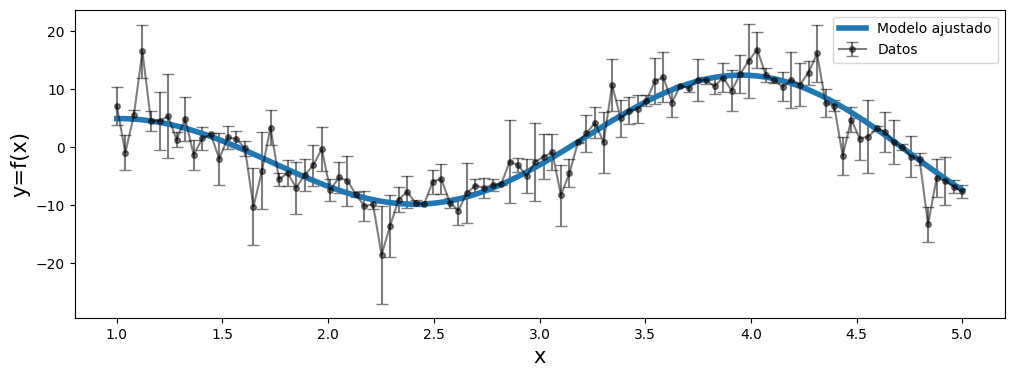

In [ ]:
plt.figure(figsize=(12,4))

plt.errorbar(x_values, datos_random, yerr=sigmas, capsize=4, marker='o', alpha=0.5, color='black', label='Datos', markersize=4)
plt.plot(x_values, funcion(x_values, *params), label='Modelo ajustado',linewidth=4)
plt.xlabel('x', fontsize=15)
plt.ylabel('y=f(x)', fontsize=15)
plt.legend()
plt.show()